## Office Supplies Data (P2- OfficeSupplies Data.csv) 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
import pandas as pd

# Load the Office Supplies data
file_path = 'P2- OfficeSupplies Data.csv'
office_supplies_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print(office_supplies_data.head())

# Display column names to verify the data structure
print(office_supplies_data.columns)

# Add a new column to calculate total sales (Units * Unit Price)
office_supplies_data['Sales'] = office_supplies_data['Units'] * office_supplies_data['Unit Price']

# Display the dataframe with the new Sales column to verify
print(office_supplies_data.head())


   OrderDate   Region      Rep     Item  Units  Unit Price
0  04-Jul-14     East  Richard  Pen Set     62        4.99
1  12-Jul-14     East     Nick   Binder     29        1.99
2  21-Jul-14  Central   Morgan  Pen Set     55       12.49
3  29-Jul-14     East    Susan   Binder     81       19.99
4  07-Aug-14  Central  Matthew  Pen Set     42       23.95
Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price'], dtype='object')
   OrderDate   Region      Rep     Item  Units  Unit Price    Sales
0  04-Jul-14     East  Richard  Pen Set     62        4.99   309.38
1  12-Jul-14     East     Nick   Binder     29        1.99    57.71
2  21-Jul-14  Central   Morgan  Pen Set     55       12.49   686.95
3  29-Jul-14     East    Susan   Binder     81       19.99  1619.19
4  07-Aug-14  Central  Matthew  Pen Set     42       23.95  1005.90


## 1. Sales Analysis
 ### (a) Total sales for each product category

In [7]:
# Calculate total sales for each product category
office_supplies_data['Sales'] = office_supplies_data['Units'] * office_supplies_data['Unit Price']
total_sales_per_category = office_supplies_data.groupby('Item')['Sales'].sum().reset_index()
print(total_sales_per_category)


      Item    Sales
0   Binder  9577.65
1     Desk  1700.00
2      Pen  2045.22
3  Pen Set  4169.87
4   Pencil  2135.14


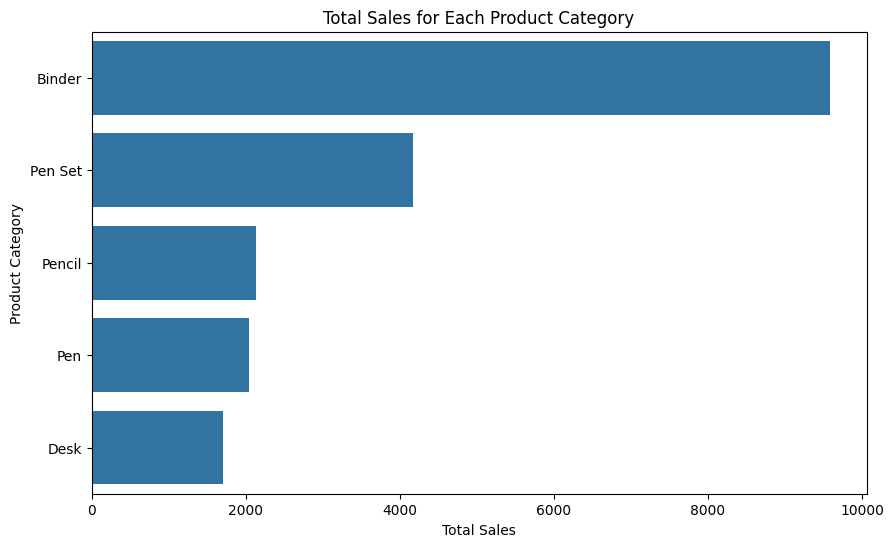

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales for each product category
total_sales_per_category = office_supplies_data.groupby('Item')['Sales'].sum().reset_index()

# Plotting the total sales per category
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Item', data=total_sales_per_category.sort_values(by='Sales', ascending=False))
plt.title('Total Sales for Each Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()


### (b) Product category with the highest sales

In [8]:
# Identify the product category with the highest sales
highest_sales_category = total_sales_per_category.loc[total_sales_per_category['Sales'].idxmax()]
print(highest_sales_category)


Item      Binder
Sales    9577.65
Name: 0, dtype: object


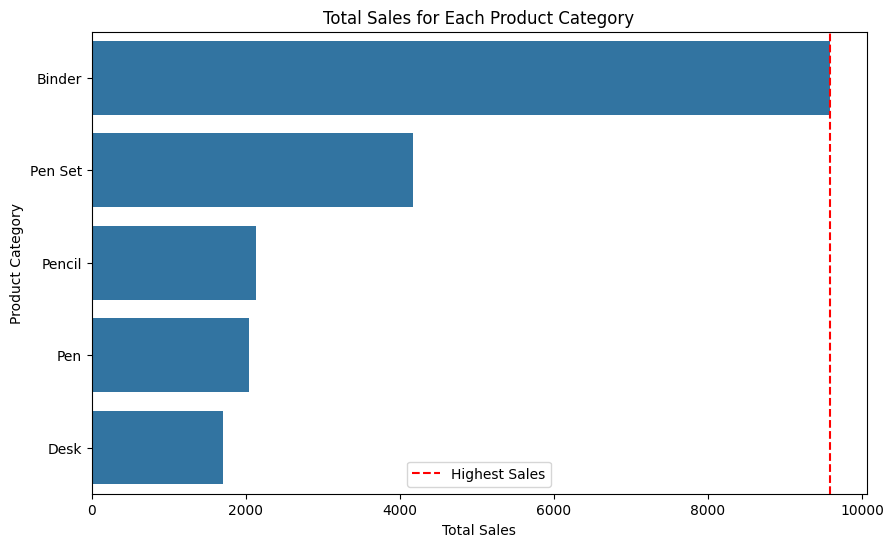

In [22]:
# Highest sales category is already identified in the previous task (total_sales_per_category)
highest_sales_category = total_sales_per_category.loc[total_sales_per_category['Sales'].idxmax()]

# Highlight the highest sales category on the previous barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Item', data=total_sales_per_category.sort_values(by='Sales', ascending=False))
plt.axvline(highest_sales_category['Sales'], color='red', linestyle='--', label='Highest Sales')
plt.title('Total Sales for Each Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.legend()
plt.show()


### (c) Top 10 best-selling products

In [9]:
# Identify the top 10 best-selling products
top_10_best_selling_products = office_supplies_data.groupby('Item')['Units'].sum().reset_index()
top_10_best_selling_products = top_10_best_selling_products.sort_values(by='Units', ascending=False).head(10)
print(top_10_best_selling_products)


      Item  Units
0   Binder    722
4   Pencil    716
3  Pen Set    395
2      Pen    278
1     Desk     10


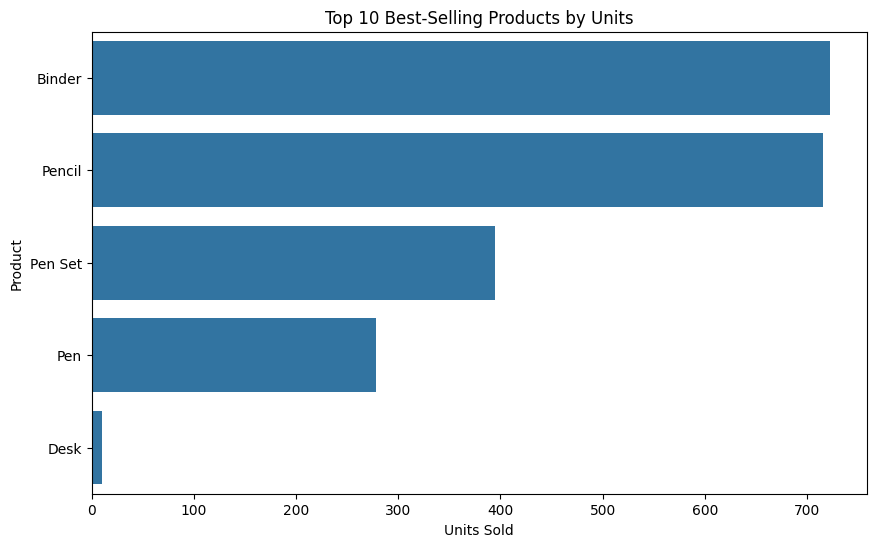

In [23]:
# Identify the top 10 best-selling products by units
top_10_best_selling_products = office_supplies_data.groupby('Item')['Units'].sum().reset_index()
top_10_best_selling_products = top_10_best_selling_products.sort_values(by='Units', ascending=False).head(10)

# Plotting the top 10 best-selling products
plt.figure(figsize=(10, 6))
sns.barplot(x='Units', y='Item', data=top_10_best_selling_products)
plt.title('Top 10 Best-Selling Products by Units')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.show()


## 2. Customer Analysis
### (a) Top 10 customers by sales

In [10]:
# Identify the top 10 customers by sales
top_10_customers_by_sales = office_supplies_data.groupby('Rep')['Sales'].sum().reset_index()
top_10_customers_by_sales = top_10_customers_by_sales.sort_values(by='Sales', ascending=False).head(10)
print(top_10_customers_by_sales)


        Rep    Sales
3   Matthew  3109.44
9     Susan  3102.30
0      Alex  2812.19
7   Richard  2363.04
1      Bill  1749.87
8     Smith  1641.43
4    Morgan  1387.77
2     James  1283.61
10   Thomas  1203.11
5      Nick   536.75


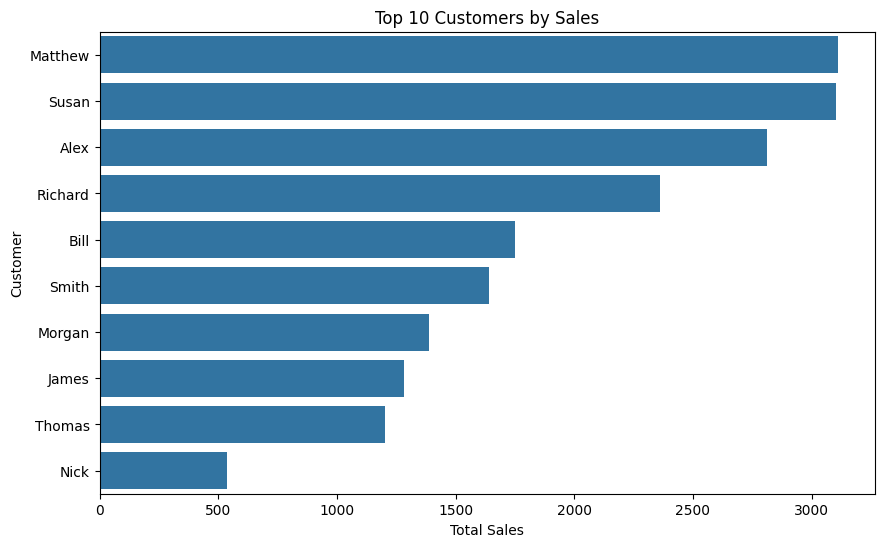

In [24]:
# Identify the top 10 customers by sales
top_10_customers_by_sales = office_supplies_data.groupby('Rep')['Sales'].sum().reset_index()
top_10_customers_by_sales = top_10_customers_by_sales.sort_values(by='Sales', ascending=False).head(10)

# Plotting the top 10 customers by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Rep', data=top_10_customers_by_sales)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.show()


### (b) Total number of unique customers

In [11]:
# Count the total number of unique customers
unique_customers_count = office_supplies_data['Rep'].nunique()
print(unique_customers_count)


11


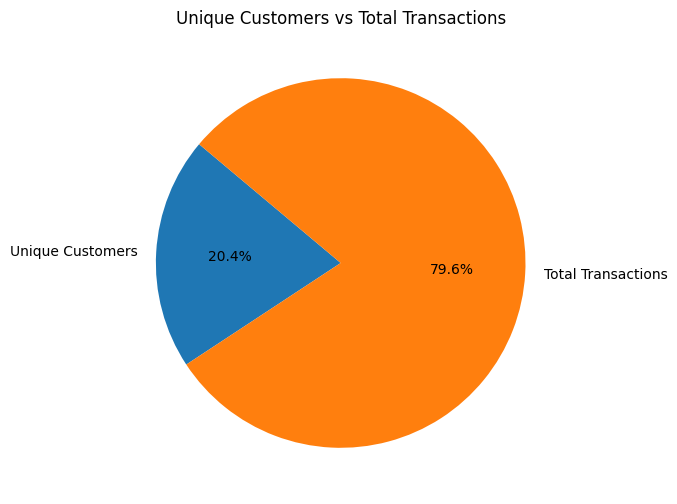

In [25]:
# Count the total number of unique customers
unique_customers_count = office_supplies_data['Rep'].nunique()

# Pie chart for unique customers (for a more interesting visualization, we compare unique vs total records)
total_records = len(office_supplies_data)
unique_vs_total = pd.DataFrame({
    'Type': ['Unique Customers', 'Total Transactions'],
    'Count': [unique_customers_count, total_records]
})

# Plotting the unique vs total transactions
plt.figure(figsize=(6, 6))
plt.pie(unique_vs_total['Count'], labels=unique_vs_total['Type'], autopct='%1.1f%%', startangle=140)
plt.title('Unique Customers vs Total Transactions')
plt.show()


### (c) Customer purchase frequency

In [12]:
# Analyze customer purchase frequency
customer_purchase_frequency = office_supplies_data['Rep'].value_counts().reset_index()
customer_purchase_frequency.columns = ['Rep', 'Frequency']
print(customer_purchase_frequency)


        Rep  Frequency
0   Richard          8
1      Bill          5
2      Alex          5
3    Rachel          4
4     James          4
5   Matthew          4
6    Morgan          3
7     Smith          3
8     Susan          3
9      Nick          2
10   Thomas          2


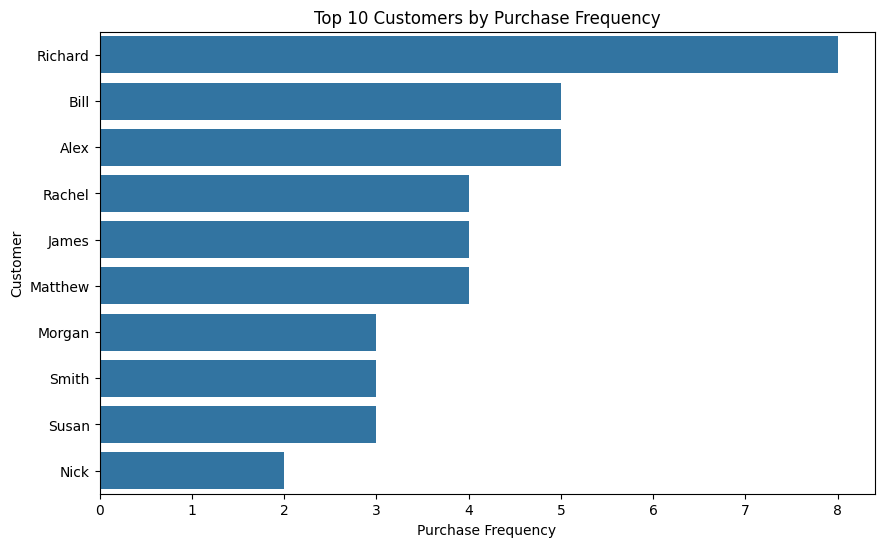

In [26]:
# Analyze customer purchase frequency
customer_purchase_frequency = office_supplies_data['Rep'].value_counts().reset_index()
customer_purchase_frequency.columns = ['Rep', 'Frequency']

# Plotting customer purchase frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Rep', data=customer_purchase_frequency.head(10))
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Customer')
plt.show()


## 3. Time Series Analysis
### (a) Monthly sales trends over the past year

In [14]:
# Convert OrderDate to datetime format with specified format to avoid parsing warning
office_supplies_data['OrderDate'] = pd.to_datetime(office_supplies_data['OrderDate'], format='%d-%b-%y')

# Display the dataframe with the parsed OrderDate column to verify
print(office_supplies_data.head())


   OrderDate   Region      Rep     Item  Units  Unit Price    Sales YearMonth
0 2014-07-04     East  Richard  Pen Set     62        4.99   309.38   2014-07
1 2014-07-12     East     Nick   Binder     29        1.99    57.71   2014-07
2 2014-07-21  Central   Morgan  Pen Set     55       12.49   686.95   2014-07
3 2014-07-29     East    Susan   Binder     81       19.99  1619.19   2014-07
4 2014-08-07  Central  Matthew  Pen Set     42       23.95  1005.90   2014-08


In [15]:
# Convert OrderDate to datetime format
office_supplies_data['OrderDate'] = pd.to_datetime(office_supplies_data['OrderDate'])

# Extract month and year for grouping
office_supplies_data['YearMonth'] = office_supplies_data['OrderDate'].dt.to_period('M')

# Calculate monthly sales trends
monthly_sales_trends = office_supplies_data.groupby('YearMonth')['Sales'].sum().reset_index()
print(monthly_sales_trends)


   YearMonth    Sales
0    2014-07  2673.23
1    2014-08  2005.55
2    2014-09   666.11
3    2014-10  1984.57
4    2014-11   833.78
5    2014-12  3288.47
6    2015-01  1602.09
7    2015-02  2044.33
8    2015-03   556.87
9    2015-04  1059.03
10   2015-05  1300.35
11   2015-06  1613.50


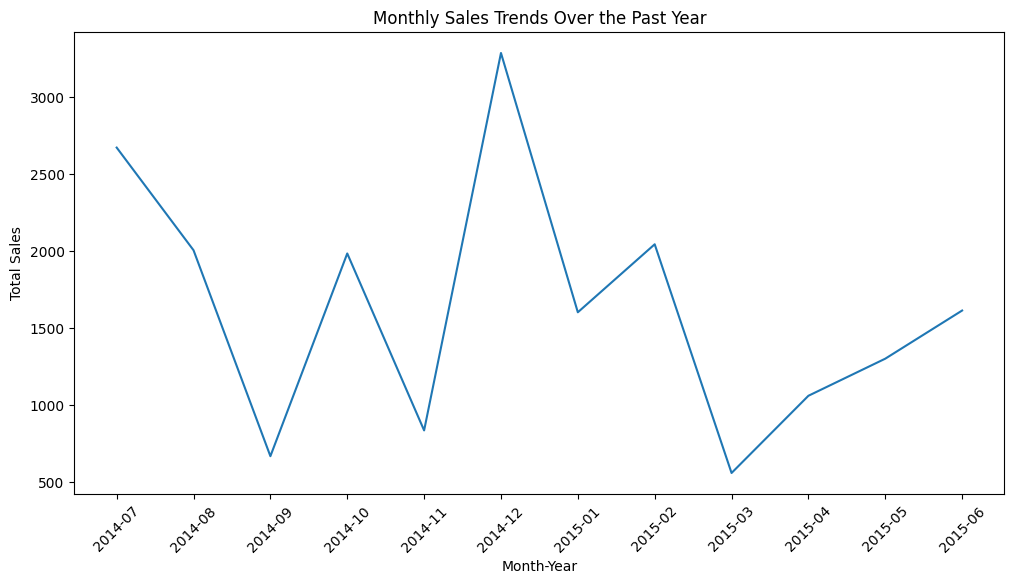

In [28]:
# Extract month and year for grouping
office_supplies_data['YearMonth'] = office_supplies_data['OrderDate'].dt.to_period('M')

# Calculate monthly sales trends
monthly_sales_trends = office_supplies_data.groupby('YearMonth')['Sales'].sum().reset_index()

# Convert the YearMonth to a string for plotting
monthly_sales_trends['YearMonth'] = monthly_sales_trends['YearMonth'].astype(str)

# Plotting the monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales_trends)
plt.title('Monthly Sales Trends Over the Past Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### (b) Identify any seasonal patterns in the sales data

In [16]:
# Plotting or deeper analysis is usually done for identifying seasonal patterns.
# However, here we aggregate sales by month to observe potential patterns.
office_supplies_data['Month'] = office_supplies_data['OrderDate'].dt.month
seasonal_sales_patterns = office_supplies_data.groupby('Month')['Sales'].sum().reset_index()
print(seasonal_sales_patterns)


    Month    Sales
0       1  1602.09
1       2  2044.33
2       3   556.87
3       4  1059.03
4       5  1300.35
5       6  1613.50
6       7  2673.23
7       8  2005.55
8       9   666.11
9      10  1984.57
10     11   833.78
11     12  3288.47


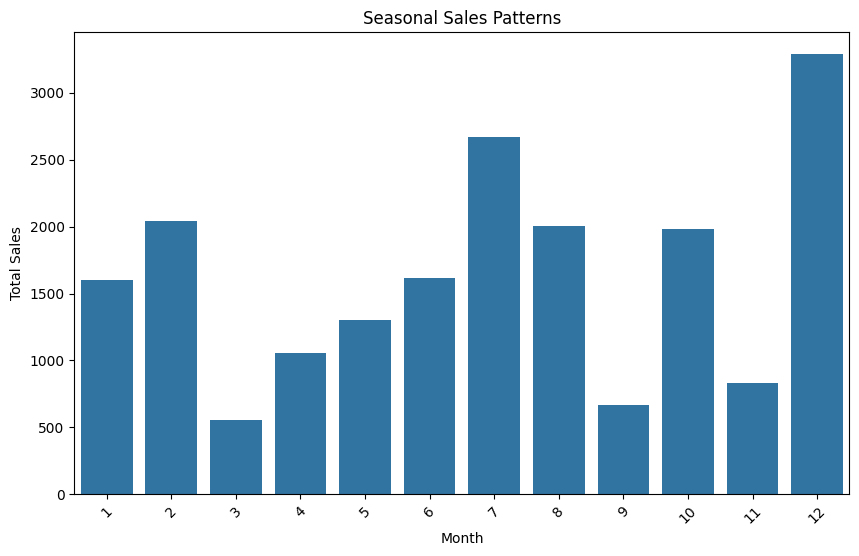

In [29]:
# Aggregate sales by month to observe potential seasonal patterns
office_supplies_data['Month'] = office_supplies_data['OrderDate'].dt.month
seasonal_sales_patterns = office_supplies_data.groupby('Month')['Sales'].sum().reset_index()

# Plotting the seasonal sales patterns
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=seasonal_sales_patterns)
plt.title('Seasonal Sales Patterns')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


## 4. Geographical Analysis
### (a) Regions generating the most sales

In [17]:
# Identify which regions generate the most sales
sales_by_region = office_supplies_data.groupby('Region')['Sales'].sum().reset_index()
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)
print(sales_by_region)


    Region     Sales
0  Central  11139.07
1     East   6002.09
2     West   2486.72


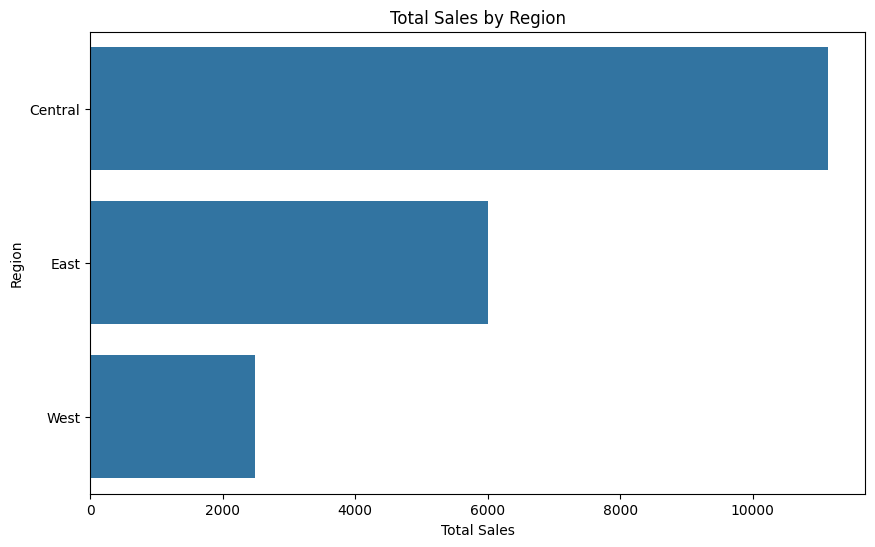

In [30]:
# Identify which regions generate the most sales
sales_by_region = office_supplies_data.groupby('Region')['Sales'].sum().reset_index()
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Plotting the sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Region', data=sales_by_region)
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()


### (b) Sales trends across different regions

In [18]:
# Calculate sales trends across different regions
regional_sales_trends = office_supplies_data.groupby(['Region', 'YearMonth'])['Sales'].sum().reset_index()
print(regional_sales_trends)


     Region YearMonth    Sales
0   Central   2014-07   686.95
1   Central   2014-08  1005.90
2   Central   2014-09   259.03
3   Central   2014-10   269.78
4   Central   2014-11   533.93
5   Central   2014-12  2105.21
6   Central   2015-01  1413.04
7   Central   2015-02  2024.37
8   Central   2015-03   249.50
9   Central   2015-04   280.59
10  Central   2015-05  1236.67
11  Central   2015-06  1074.10
12     East   2014-07  1986.28
13     East   2014-08   174.65
14     East   2014-09   255.84
15     East   2014-10   575.36
16     East   2014-11   299.85
17     East   2014-12  1183.26
18     East   2015-01   189.05
19     East   2015-02    19.96
20     East   2015-04   778.44
21     East   2015-06   539.40
22     West   2014-08   825.00
23     West   2014-09   151.24
24     West   2014-10  1139.43
25     West   2015-03   307.37
26     West   2015-05    63.68


Region          object
YearMonth    period[M]
Sales          float64
dtype: object
Region        object
YearMonth     object
Sales        float64
dtype: object


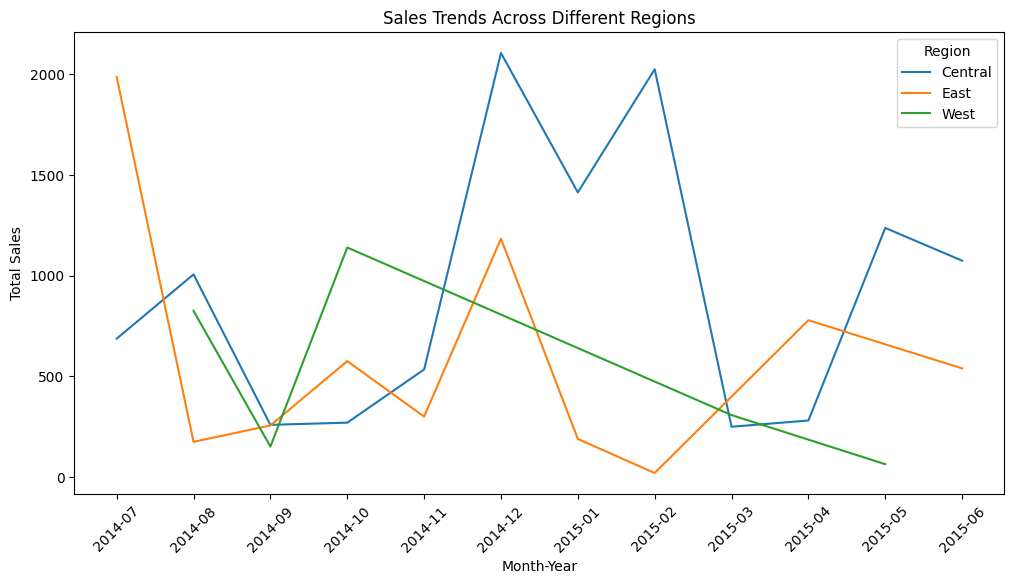

In [32]:
# Checking data types and handling potential issues
print(regional_sales_trends.dtypes)

# Convert YearMonth to string
regional_sales_trends['YearMonth'] = regional_sales_trends['YearMonth'].astype(str)

# Convert Sales to numeric (if not already)
regional_sales_trends['Sales'] = pd.to_numeric(regional_sales_trends['Sales'], errors='coerce')

# Ensure there are no NaN values in Sales
regional_sales_trends = regional_sales_trends.dropna(subset=['Sales'])

# Check the data types again to confirm changes
print(regional_sales_trends.dtypes)

# Plotting the sales trends across different regions
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Sales', hue='Region', data=regional_sales_trends)
plt.title('Sales Trends Across Different Regions')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


## 5. Profit Analysis
### (a) Total profit for each product category

In [19]:
# Assume a profit margin (since profit data is not directly available). Here, we assume a 20% margin for demonstration.
office_supplies_data['Profit'] = office_supplies_data['Sales'] * 0.20

# Calculate total profit for each product category
total_profit_per_category = office_supplies_data.groupby('Item')['Profit'].sum().reset_index()
print(total_profit_per_category)


      Item    Profit
0   Binder  1915.530
1     Desk   340.000
2      Pen   409.044
3  Pen Set   833.974
4   Pencil   427.028


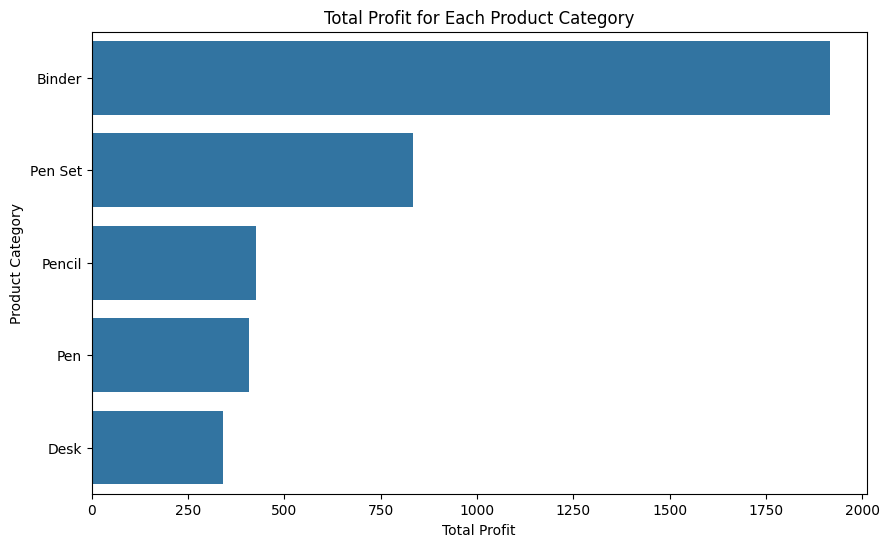

In [33]:
# Assume a profit margin (since profit data is not directly available). Here, we assume a 20% margin for demonstration.
office_supplies_data['Profit'] = office_supplies_data['Sales'] * 0.20

# Calculate total profit for each product category
total_profit_per_category = office_supplies_data.groupby('Item')['Profit'].sum().reset_index()

# Plotting the total profit per product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Item', data=total_profit_per_category.sort_values(by='Profit', ascending=False))
plt.title('Total Profit for Each Product Category')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.show()


### (b) Top 10 most profitable products

In [20]:
# Identify the top 10 most profitable products
top_10_profitable_products = total_profit_per_category.sort_values(by='Profit', ascending=False).head(10)
print(top_10_profitable_products)


      Item    Profit
0   Binder  1915.530
3  Pen Set   833.974
4   Pencil   427.028
2      Pen   409.044
1     Desk   340.000


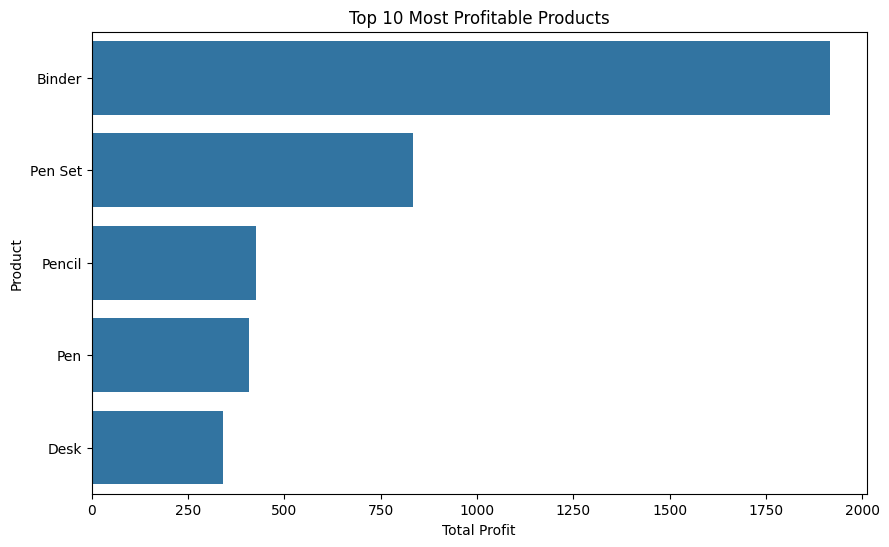

In [34]:
# Identify the top 10 most profitable products
top_10_profitable_products = total_profit_per_category.sort_values(by='Profit', ascending=False).head(10)

# Plotting the top 10 most profitable products
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Item', data=top_10_profitable_products)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.show()


## Churn Modelling Data (P3- Churn-Modelling Data.xlsx) 
### 1. Customer Demographics
#### a. Distribution of Customers Across Different Age Groups

In [36]:
!pip install openpyxl



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.9 kB 328.2 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/250.9 kB 607.9 kB/s eta 0:00:01
   -------------------------------------  245.8/250.9 kB 885.4 kB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 810.3 kB/s eta 0:00:00


C:\Users\USER\AppData\Local\Temp\ipykernel_10164\3000416773.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=churn_data, palette='viridis')


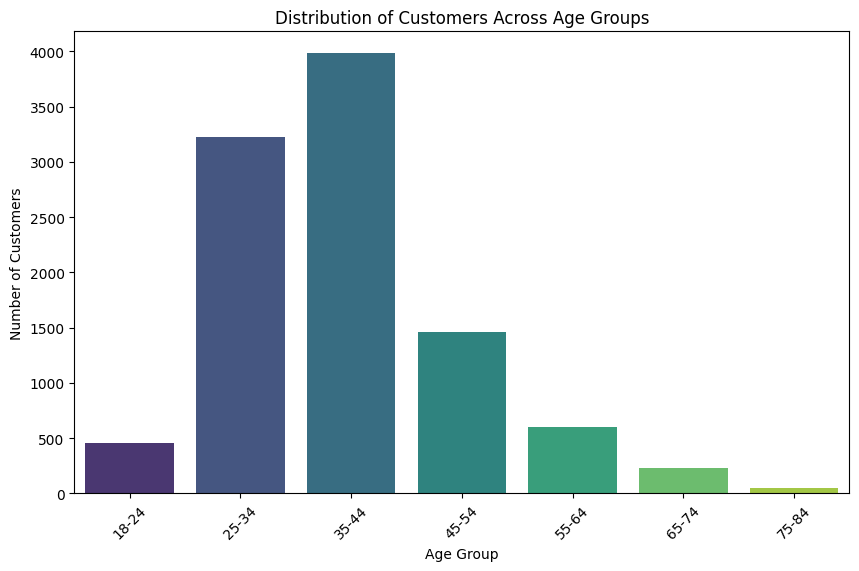

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'P3- Churn-Modelling Data.xlsx'
churn_data = pd.read_excel(file_path, sheet_name='data')

# Define age groups for categorization
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

# Categorize customers into age groups
churn_data['AgeGroup'] = pd.cut(churn_data['Age'], bins=bins, labels=labels, right=False)

# Plot the distribution of customers across different age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=churn_data, palette='viridis')
plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


#### b. Analyze the Gender Distribution of Customers

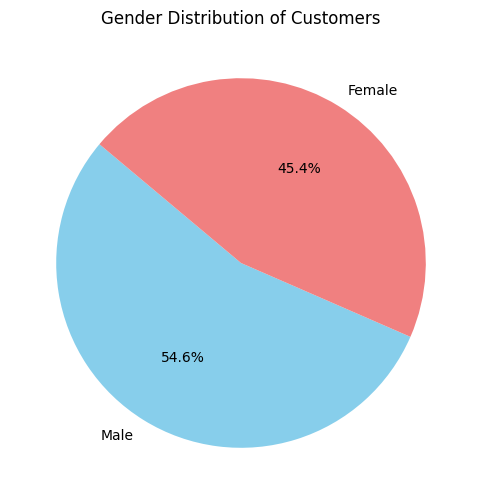

In [44]:
# Plot the gender distribution of customers
plt.figure(figsize=(6, 6))
gender_count = churn_data['Gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.show()


## 2. Churn Analysis
#### a. Percentage of Customers Who Have Churned

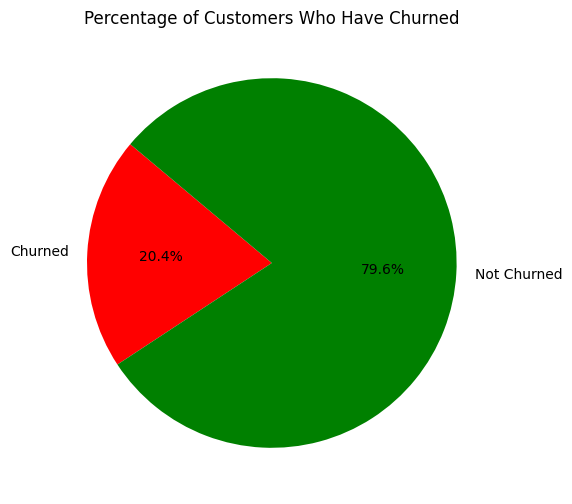

In [46]:
# Calculate the churn percentage
churn_percentage = churn_data['churned'].mean() * 100

# Visualize the churn percentage
plt.figure(figsize=(6, 6))
plt.pie([churn_percentage, 100 - churn_percentage], labels=['Churned', 'Not Churned'], autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Percentage of Customers Who Have Churned')
plt.show()


#### b. Main Reasons for Customer Churn

In [47]:
# Analyze main reasons for churn based on available data
# For simplicity, we will check correlations with the 'churned' column

correlation_with_churn = churn_data.corr()['churned'].sort_values(ascending=False)
print(correlation_with_churn)


ValueError: could not convert string to float: 'Hargrave'

#### c. Patterns or Trends Among Customers Who Have Churned

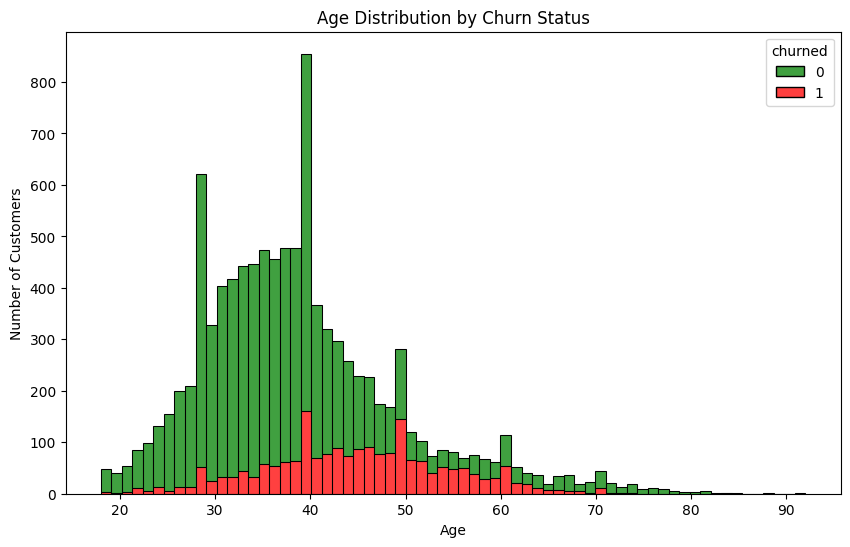

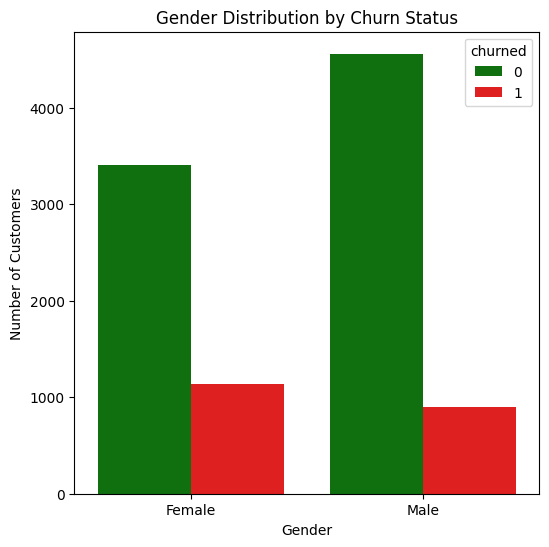

In [49]:
# Analyze patterns or trends among churned customers
# Let's look at the age and gender distribution of churned vs. non-churned customers

plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data, x='Age', hue='churned', multiple='stack', palette=['green', 'red'])
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='churned', data=churn_data, palette=['green', 'red'])
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


## 3. Product Usage
#### a. Most Commonly Used Products or Services

C:\Users\USER\AppData\Local\Temp\ipykernel_10164\993078061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=churn_data, palette='viridis')


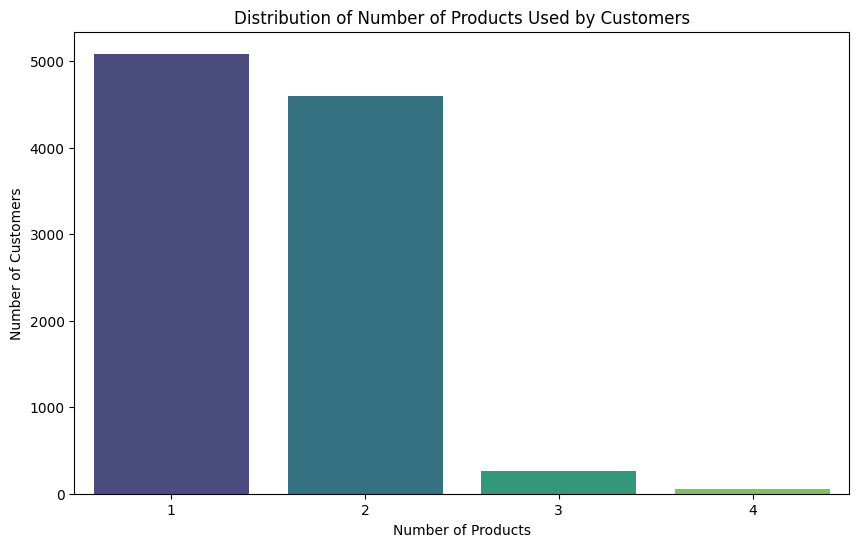

In [50]:
# Analyze the most commonly used products
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=churn_data, palette='viridis')
plt.title('Distribution of Number of Products Used by Customers')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.show()


#### b. Usage Patterns of Different Customer Segments

C:\Users\USER\AppData\Local\Temp\ipykernel_10164\3612624409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='NumOfProducts', data=churn_data, palette='viridis')


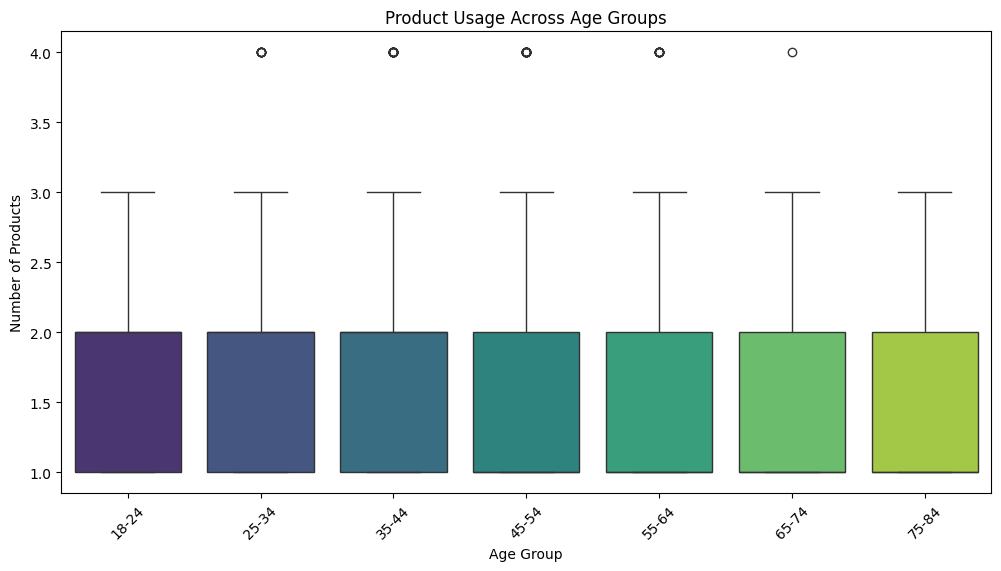

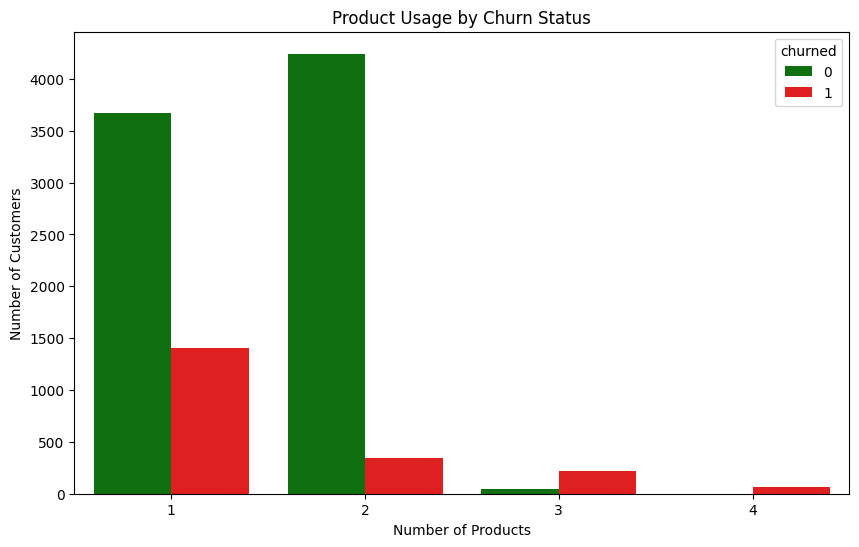

In [51]:
# Analyze product usage patterns across different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='NumOfProducts', data=churn_data, palette='viridis')
plt.title('Product Usage Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Analyze product usage patterns across churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='churned', data=churn_data, palette=['green', 'red'])
plt.title('Product Usage by Churn Status')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.show()


## 4. Financial Analysis
#### a. Average Account Balance of Customers

The average account balance of customers is: 76485.89


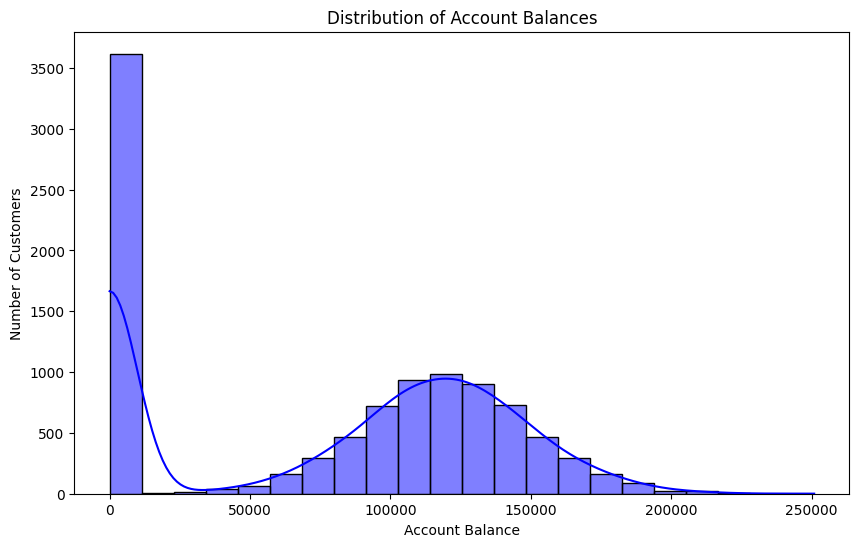

In [52]:
# Calculate the average account balance
average_balance = churn_data['Balance'].mean()
print(f'The average account balance of customers is: {average_balance:.2f}')

# Visualize the distribution of account balances
plt.figure(figsize=(10, 6))
sns.histplot(churn_data['Balance'], kde=True, color='blue')
plt.title('Distribution of Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('Number of Customers')
plt.show()


#### b. Compare Financial Characteristics of Churned vs. Non-Churned Customers

churned
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_10164\319647882.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y='Balance', data=churn_data, palette=['green', 'red'])


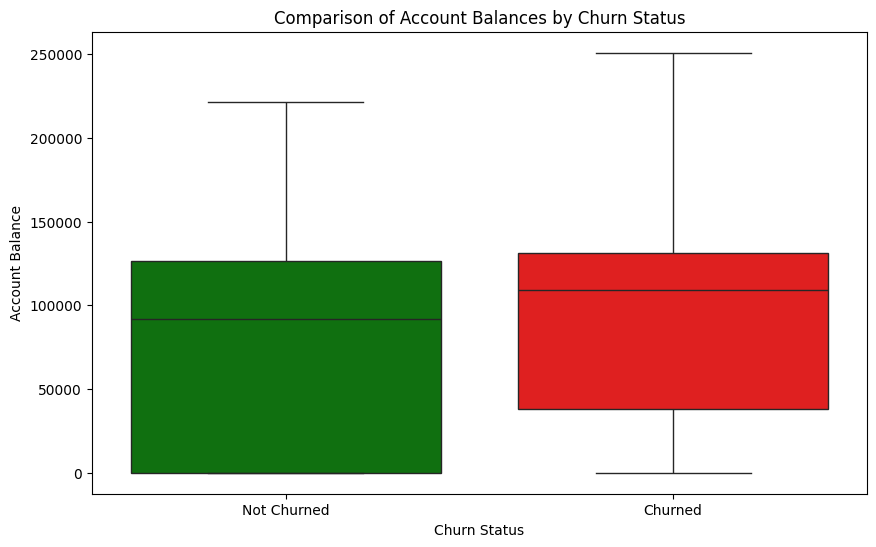

In [53]:
# Compare average account balance between churned and non-churned customers
average_balance_by_churn = churn_data.groupby('churned')['Balance'].mean()
print(average_balance_by_churn)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='Balance', data=churn_data, palette=['green', 'red'])
plt.title('Comparison of Account Balances by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Account Balance')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


## 5. Predictive Modeling
#### a. Significant Predictors of Customer Churn

In [54]:
# Identify significant predictors using correlation matrix
correlation_matrix = churn_data.corr()
significant_predictors = correlation_matrix['churned'].sort_values(ascending=False)
print(significant_predictors)


ValueError: could not convert string to float: 'Hargrave'

#### b. Develop a Predictive Model to Identify At-Risk Customers

In [ ]:
!pip install scikit-learn


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for modeling
# Drop columns that are not needed or are identifiers
features = churn_data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'churned'])

# Convert categorical variables to dummy/indicator variables
features = pd.get_dummies(features, drop_first=True)

# Target variable
target = churn_data['churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)
print(feature_importance.head(10))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.86
Age                  0.160976
EstimatedSalary      0.145290
CreditScore          0.139849
Balance              0.137029
NumOfProducts        0.123900
Tenure               0.085071
IsActiveMember       0.047326
AgeGroup_45-54       0.031617
Geography_Germany    0.025764
Gender_Male          0.021749
dtype: float64
